<h1><center>Model 1: Logisitic Regression Performance</center></h1>

This notebook will look into the performance of the model on the training dataset, inorder to find where and how to improve on future models.

## Import Libraries

In [50]:
import sys
sys.path.append("C:\Project\playground-series-s3e5\src")

from target_mapping import *
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [4]:
train = pd.read_csv("../data/feature_engineered_data/train.csv")
train.head()

,quality,trans_citric_acid,pca1,pca2,pca3,pca4,pca5
0,6,0.574595,-1.424641,0.084614,0.139190,0.017038,-0.001012
1,6,2.806711,-2.059772,-0.036339,-0.764453,0.231441,0.001443
2,7,-0.991746,-0.807816,0.064889,1.641203,-0.016858,0.000201
3,5,-0.227777,0.309183,-0.098466,-0.682202,-0.339941,0.000703
4,6,0.235509,0.751813,0.421726,-0.053477,0.160119,-0.002452


## Import Model

In [8]:
model = joblib.load("../models/model1.pkl")
model

Pipeline(steps=[('smote', SMOTE(random_state=15)),
                ['classifier',
                 LogisticRegression(C=10, multi_class='multinomial',
                                    random_state=15, solver='newton-cg')]])

## Analysis

In [30]:
y_pred = model.predict(train.loc[:, train.columns!="quality"])
y_pred = pd.DataFrame(y_pred, columns=["quality"])
y_pred = encoding_to_target(y_pred.quality)
y_true = train.quality

In [45]:
matrix = confusion_matrix(y_true, y_pred, labels=[3, 4, 5, 6, 7, 8])
matrix = pd.DataFrame(matrix, columns=[3, 4, 5, 6, 7, 8], index=[3, 4, 5, 6, 7, 8])

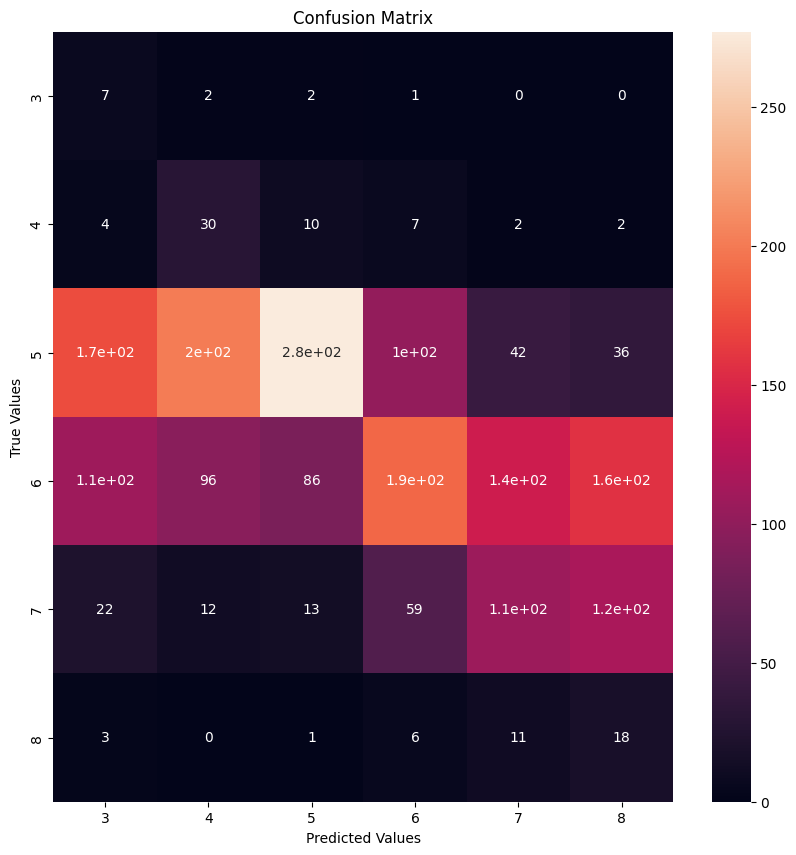

In [49]:
plt.figure(figsize=(10,10))
sns.heatmap(matrix, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

Despite performing SMOTE to account for imbalanced data, from the above heatmap we can see that classes with least amount of data in training set had the highest misclassification errror.

In [51]:
import shap

ModuleNotFoundError: No module named 'shap'